In [417]:
%matplotlib inline
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [463]:
f = h5py.File('short-examples/softattention.hdf5', 'r')

In [464]:
attentions = f['attention'][:]

In [465]:
offsets = f['offsets'][:]
offsets

array([ 1, 14, 26])

In [466]:
attentions.shape

(100, 11)

In [422]:
#remove zero rows
# num_examples = np.argmin(attentions[:, 0])
# attentions = attentions[:num_examples]

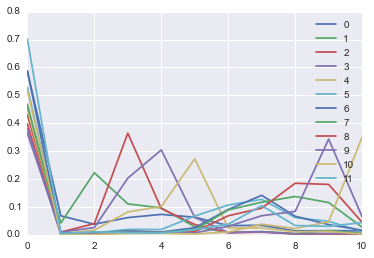

In [467]:
for i in xrange(12):
    plt.plot(attentions[i], label = i)
plt.legend()

In [468]:
#cheating the numbers a little, can comment out
#old_std = np.std(attentions[:, 0])
#before_change = attentions[offsets-2, 0].copy()
attentions[:, 0] = 0.01#old_std*.02
#attentions[offsets, 0] = before_change

In [469]:
for i in xrange(attentions.shape[0]):
#     attentions[i][0] = 0.
    attentions[i] *= 1/ np.sum(attentions[i])

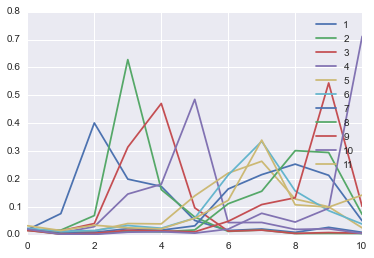

In [470]:
for i in xrange(1,12):
    plt.plot(attentions[i], label = str(i))
plt.legend()

In [427]:
f.close()
f = h5py.File('short-examples/softattention_new.hdf5', 'w')
f['attention'] = attentions
f['offsets'] = offsets-2
print f['offsets'][:]
f.close()

[-1 11 22]


In [471]:
translation = []
with open("data/de-short.txt") as f:
    for line in f:
        translation.append(line[:-1])

In [479]:
source = []
with open("data/en-short.txt") as f:
    for line in f:
        source.append(line[:-1])

In [480]:
source

['This is a padding sentence, please ignore it in vis . ',
 'The cat owner ran, because he was scared of dogs .',
 'The cat owner ran, and he was scared of dogs .']

In [432]:
offsets = offsets-2


In [477]:
def aligning_attention(offset_index):
    s = source[offset_index].split()[:-1]
#     print len(s)
    t = translation[offset_index].decode('utf-8').split()
#     print len(t)
    i1 = offsets[offset_index]
    #i2 = offsets[offset_index+1]
    print i1, #i2
    a = attentions[i1-1:i1+len(s),1:]
    print a.shape
    print len(s)
    print len(t)
    plt.figure(figsize=(10,8))
    sns.heatmap(a, xticklabels=s, yticklabels=t)

26 (11, 10)
10
11


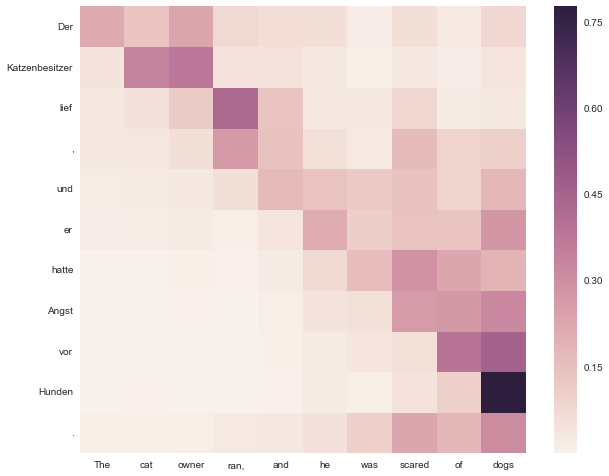

In [478]:
aligning_attention(2)

In [363]:
offsets

array([ 1, 13, 24])

In [270]:
translation[6].decode('utf-8')

u'Der schnelle braune Hund huepfte ueber den faulen Hund . '